Назва дисципліни: Обробка та аналіз біомедичних даних

Група: БС-83

Студент: Каліновська Б.В.

Лабораторна робота №7

Тема:t-критерій Стьюдента для незалежних вибірок

Завдання:

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам

In [1]:
#Імпортування бібліотек
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
#Складаємо таблицю
#Дві команди грають у волейбол,перша команда складається тільки з чоловіків друга тільки з жінок
#Рахувалась кількість ударів по мячу за гру
hit_ball_1 = [110,90,85,150,108,77,55,62,104,122,140]
hit_ball_2 = [91,71,105,100,131,142,96,83,107,97,86]
st_table = pd.DataFrame({'Команда Ч':hit_ball_1,
                            'Команда Ж':hit_ball_2},
                            index=np.arange(1, len(hit_ball_1) + 1))
st_table.columns.name = '№ гри'

st_table

№ гри,Команда Ч,Команда Ж
1,110,91
2,90,71
3,85,105
4,150,100
5,108,131
6,77,142
7,55,96
8,62,83
9,104,107
10,122,97


2. Побудувати графік, що відображає розкид даних в групах

[Text(0, 0.5, 'Підрахунок кількості ударів по мячу за волейбольний турнір у двох командах'),
 Text(0.5, 0, 'Кількість ударів по мячу')]

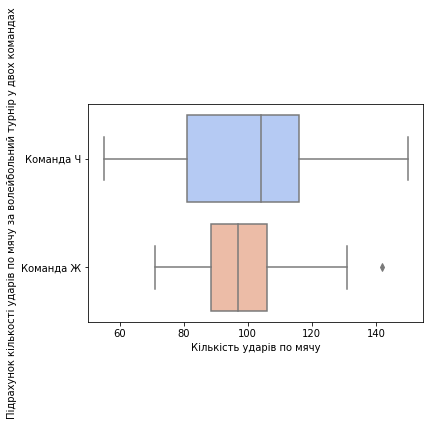

In [3]:
#Діаграма розмаху, коро́бковий графік, графік «ящик з вусами» — засіб візуалізації в описовій статистиці груп числових даних 
#через їх квантилі. Коробковий графік може також мати лінії, які виходять вертикально з коробки (вони називаються вусами), 
#вони вказують величину мінливості поза верхньою та нижньою межами квантиля. Викиди може бути нанесено у вигляді точок.

sns.boxplot( data=st_table, orient='h', palette='coolwarm').set(xlabel='Кількість ударів по мячу', 
                                                        ylabel='Підрахунок кількості ударів по мячу за волейбольний турнір у двох командах')

3. Написати функцію для оцінки вімінностей дисперсій між групами за критерієм Лівеня. Функція має повертати значення тесту та результат оцінки рівності дисперсій (significant або not significant)

In [4]:
#Підрахуємо спочатку дисперсію для першого і для другого масиву, де arr- масив для якого ми шукаємо дисперсію
#Обчислимо дисперсію за функцією var() - обчислює дисперсію значень елементів масива
def duspersia(arr):
    return np.var(arr)

def Livena(team_1, team_2):
    d_1 = duspersia(team_1)
    d_2 = duspersia(team_2)
    if(d_1 >= d_2):
        F=d_1/d_2
    else:
        F=d_2/d_1 
    print("------------------------------------------------------- ")    
    print("-------Тест Лівеня: перевірка рівності дисперсії-------")
    print("------------------------------------------------------- ")
    print("Значення критерію: F = ", F)
    
    #Знайдемо ступіні свободи
    df_1=len(team_1)-1
    df_2=len(team_2)-1
    
     #Робота з файлом
  
    #Загружаємо необхідні бібліотеки
    import xlrd, xlwt
    #Відкриваємо xlsx файл
    rb = xlrd.open_workbook('Livena.xlsx')
    #Вибираємо активний лист (індексація з 0)
    sheet = rb.sheet_by_index(0)
    #Отримуємо значення необхідної нам ячейки (номер рядка - тобто ступінь свободи)[номер стовпчика]
    F_tabl = sheet.row_values(df_2 + 1)[df_1]
    print("Критичне значення критерію: F_tabl = ", F_tabl)
    if (F_tabl < F):
        result = "significant"
    else:
        result = "not significant"
    print("Оцінка рівності дисперсії: ",result)
    print("------------------------------------------------------- ")
    return result
    


In [5]:
Livena(hit_ball_1,hit_ball_2)

------------------------------------------------------- 
-------Тест Лівеня: перевірка рівності дисперсії-------
------------------------------------------------------- 
Значення критерію: F =  2.1512699095996566
Критичне значення критерію: F_tabl =  2.98
Оцінка рівності дисперсії:  not significant
------------------------------------------------------- 


'not significant'

4.Написати функцію для визначення відмінності між групами за критерієм Стьюдента в залежності від рівності/відмінності дисперсій. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості звязку (significant або not significant)

In [6]:
#Обчислимо критерій Стюдента

#Знаходимо суми масивів
def Sum_count(arr):
    sum=0
    for i in range(len(arr)):
        sum += arr[i]
    return sum/len(arr)    

#Шукаємо стандартне відхилення
#std() - обчислює середньоквадратичне (стандартне) відхилення елементів масива
def Standatne_vid(arr):
    return np.std(arr)

def Student(result, team_1, team_2):
    r_1 = "not significant"
    
    #Середньоарифметичне для двох груп
    sum_1 = Sum_count(team_1)
    sum_2 = Sum_count(team_2)
    #Довжини обох масивів
    N_1 = len(team_1)
    N_2 = len(team_2)
    #Стандартне відхилення для двох груп
    q_1 = Standatne_vid(team_1)
    q_2 = Standatne_vid(team_2)
    #Стандартне відхилення в квадраті
    q2_1 = q_1**2
    q2_2 = q_2**2
    
    
    if(r_1 == result):
        #Припускається рівність дисперсій 
        t = (abs(sum_1 - sum_2))/(math.sqrt((q2_1/N_1)+((q2_2)/N_2)))
    else:
        #Рівність дисперсій не доведена
        t = (abs(sum_1 - sum_2))/(math.sqrt(((((N_1-1)*q2_1) + ((N_2-1)*q2_2))*((1/N_1)+(1/N_2)))/(N_1 + N_2 - 2)))
        
    print("---------t критерій для незалежних вибірок-------------")
    print("------------------------------------------------------- ")
    print("Значення критерію Стюдента: t = ", t)
    
    #Визначаємо ступінь свободи
    df = N_1 + N_2 - 2
    print("Ступінь свободи: df = ", df)
     
    #Робота з файлом
    
    #Загружаємо необхідні бібліотеки
    import xlrd, xlwt
    #Відкриваємо xlsx файл
    rb = xlrd.open_workbook('Studenta.xlsx')
    #Вибираємо активний лист (індексація з 0)
    sheet = rb.sheet_by_index(0)
    #Отримуємо значення необхідної нам ячейки (номер рядка - тобто ступінь свободи)[номер стовпчика]
    t_tabl = sheet.row_values(df)[1]
    print("Критичне значення критерію Стюдента t_tabl = ", t_tabl)
    
    #Перевірка на значимість зв'язку
    if(t>t_tabl):
        result_2 = "significant"
    else:
        result_2 = "not significant"
    print("Оцінка значимості зв'язку: ", result_2)
    print("------------------------------------------------------- ")
      

In [7]:
Student(Livena(hit_ball_1,hit_ball_2),hit_ball_1, hit_ball_2 )

------------------------------------------------------- 
-------Тест Лівеня: перевірка рівності дисперсії-------
------------------------------------------------------- 
Значення критерію: F =  2.1512699095996566
Критичне значення критерію: F_tabl =  2.98
Оцінка рівності дисперсії:  not significant
------------------------------------------------------- 
---------t критерій для незалежних вибірок-------------
------------------------------------------------------- 
Значення критерію Стюдента: t =  0.05200740554127771
Ступінь свободи: df =  20
Критичне значення критерію Стюдента t_tabl =  2.086
Оцінка значимості зв'язку:  not significant
------------------------------------------------------- 


Висновок:

1) В результаті перевірки даних на рівність дисперсії за тестом Лівеня було, отримано результат F < F_tabl, що означає що ми повинні прийняти нульову гіпотезу яка говорить про рівність дисперсій

2) В результаті перевірки відмінності між групами за допомогою критерію Стюдента для незалежних вибірок, було отримано результат  t < t_tabl, що свідчить про те, що ми приймаємо нульову гіпотезу тобто заперечуємо статичну відмінність середніх